## Tests for fidelity

In [2]:
import numpy as np

def load_wavefunction(filename):
    """
    Loads wavefunction data saved as:
    t  Re(psi0) Im(psi0) Re(psi1) Im(psi1) ... Re(psiN-1) Im(psiN-1)
    """
    data = np.loadtxt(filename)
    times = data[:, 0]  # first column = time
    
    # reshape the remaining columns into (n_timesteps, n_sites, 2)
    ncols = data.shape[1] - 1
    if ncols % 2 != 0:
        raise ValueError("File format mismatch: must have even number of Re/Im columns")
    
    n_sites = ncols // 2
    re_im = data[:, 1:].reshape(-1, n_sites, 2)
    
    # construct complex wavefunction
    wf = re_im[..., 0] + 1j * re_im[..., 1]
    return times, wf

def compute_fidelity(file1, file2, outfile=None):
    """
    Compute fidelity F(t) = |<psi1(t)|psi2(t)>|^2 at each timestep.
    
    Returns:
        times (array), fidelity (array)
    """
    t1, wf1 = load_wavefunction(file1)
    t2, wf2 = load_wavefunction(file2)
    
    # check consistency
    if not np.allclose(t1, t2):
        raise ValueError("Time arrays in the two files do not match.")
    if wf1.shape != wf2.shape:
        raise ValueError(f"Shape mismatch: {wf1.shape} vs {wf2.shape}")
    
    # compute fidelity
    fidelity = np.array([np.abs(np.vdot(w1, w2))**2 for w1, w2 in zip(wf1, wf2)])
    
    if outfile is not None:
        np.savetxt(outfile, np.column_stack((t1, fidelity)), header="time Fidelity")
    
    return t1, fidelity


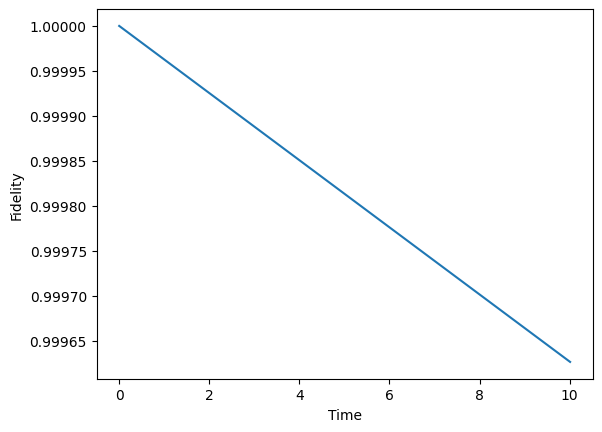

In [8]:
varyVariable = 60
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

Heff2   = rf"{base_path}\Heff2Test{varyVariable}Wavefunction.txt"
Heff2W0 = rf"{base_path}\Heff2W0Test{varyVariable}Wavefunction.txt"

times, fidelity = compute_fidelity(Heff2, Heff2W0)

import matplotlib.pyplot as plt
plt.plot(times, fidelity)
plt.xlabel("Time")
plt.ylabel("Fidelity")
plt.show()


## Heff2W0|Heff2

### Jlong Dependence close and far

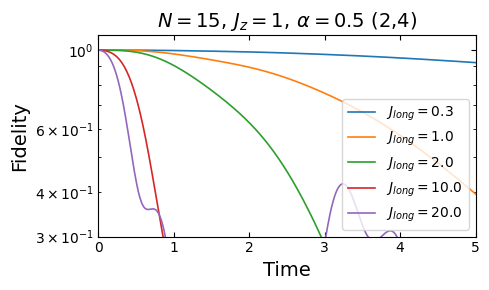

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 30, 60, 300, 600]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"N15B0Jz1FidelityHeff2a05close{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"N15B0Jz1FidelityHeff2W0a05close{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.2,
                label=fr"$J_{{long}}={varyVariable/30:.1f}$")

# === Styling ===
ax.set_xlim(0, 5)
ax.set_ylim(3e-1, 1.1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$N=15,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/N15B0Jz1FidelityHeff2Heff2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


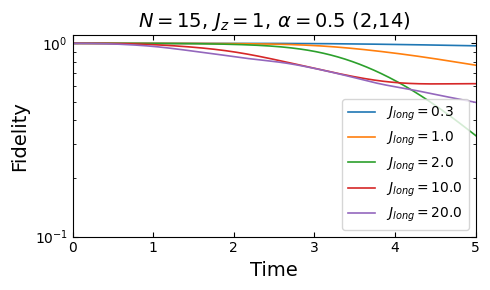

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10,30,60,300,600]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"N15B0Jz1FidelityHeff2a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"N15B0Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.2,
                label=fr"$J_{{long}}={varyVariable/30:.1f}$")

# === Styling ===
ax.set_xlim(0, 5)
ax.set_ylim(1e-1, 1.1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$N=15,\, J_z=1,\, \alpha=0.5$ (2,14)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/N15B0Jz1FidelityHeff2Heff2W0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


### Fix Jlong, N Dependence close and far

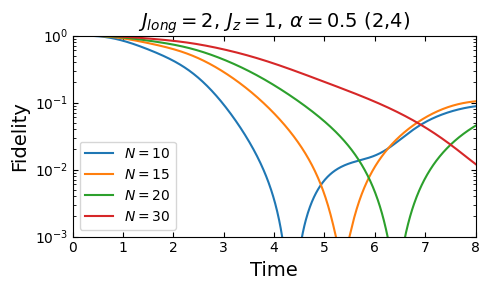

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 15, 20, 30]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2B0Jz1FidelityHeff2a05close{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2B0Jz1FidelityHeff2W0a05close{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 8)
ax.set_ylim(1e-3, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedB0Jz1Jlong2FidelityHeff2Heff2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


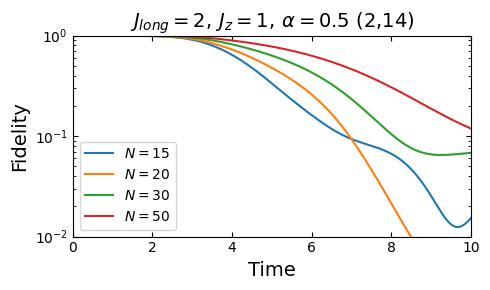

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [15, 20, 30, 50]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2B0Jz1FidelityHeff2a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2B0Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 10)
ax.set_ylim(1e-2, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0.5$ (2,14)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedB0Jz1Jlong2FidelityHeff2Heff2W0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


### Fix Jx, N Dependence close and far

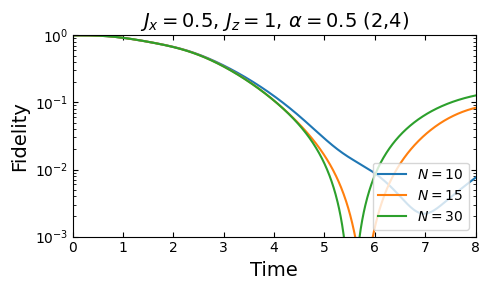

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 15, 30]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx05B0Jz1FidelityHeff2a05close{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx05B0Jz1FidelityHeff2W0a05close{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 8)
ax.set_ylim(1e-3, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=0.5,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedB0Jz1Jx05FidelityHeff2Heff2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


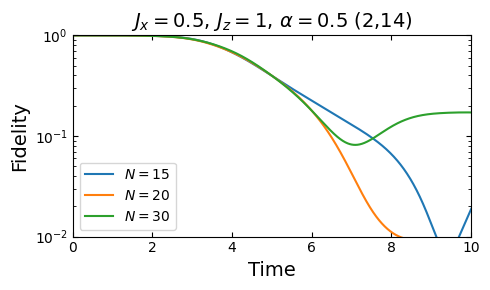

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [15, 20, 30] #, 30, 50
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx05B0Jz1FidelityHeff2a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx05B0Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 10)
ax.set_ylim(1e-2, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=0.5,\, J_z=1,\, \alpha=0.5$ (2,14)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedB0Jz1Jx05FidelityHeff2Heff2W0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


### Fidelity (band2) -HfullW0 - Hfull for alpha=0.5, Jx=3 (so it's in the region where Wintra dominates)

In [63]:
import numpy as np

Jlong=30
N=15
print(Jlong/np.sqrt(N))


7.745966692414833


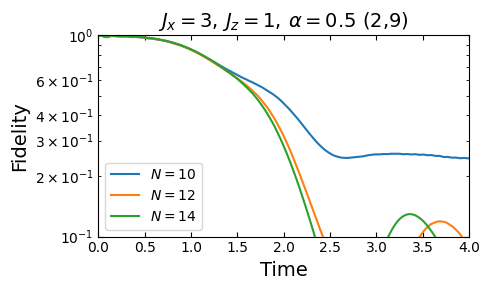

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10,12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx3Jz1FidelityHfulla05far{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHfullW0a05far{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 4)
ax.set_ylim(1e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=3,\, J_z=1,\, \alpha=0.5$ (2,9)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx3FidelityHfullHeff2W0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


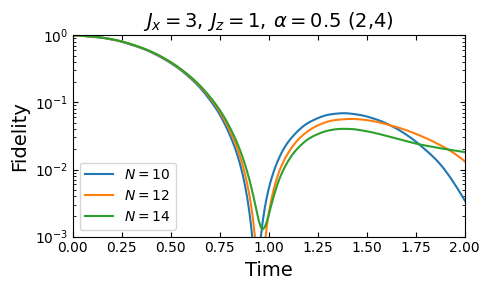

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx3Jz1FidelityHfulla05close{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHfullW0a05close{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 2)
ax.set_ylim(1e-3, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=3,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx3FidelityHfullHfull2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


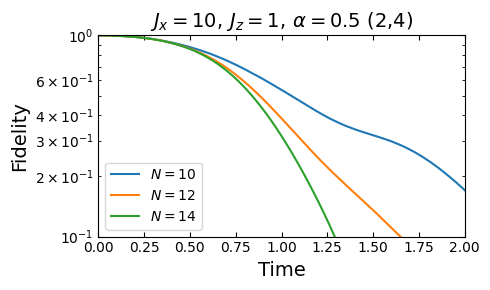

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx10Jz1FidelityHfulla05close{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx10Jz1FidelityHfullW0a05close{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 2)
ax.set_ylim(1e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=10,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx10FidelityHfullHfull2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


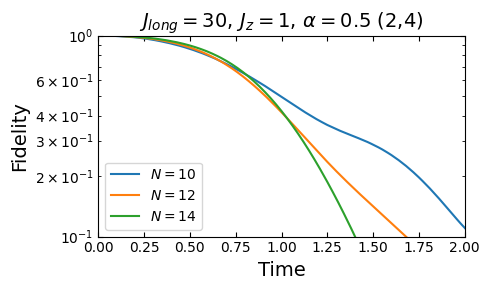

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong30Jz1FidelityHfulla05close{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong30Jz1FidelityHfullW0a05close{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 2)
ax.set_ylim(1e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=30,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jlong30FidelityHfullHfull2W0a05close.svg", dpi=600, bbox_inches="tight")
plt.show()


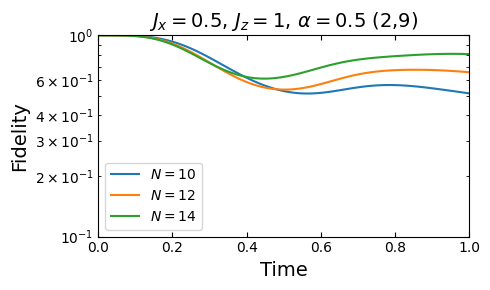

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx05Jz1FidelityHfulla05far{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHfullW0a05far{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 1)
ax.set_ylim(1e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=0.5,\, J_z=1,\, \alpha=0.5$ (2,9)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx05FidelityHfullHfullW0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


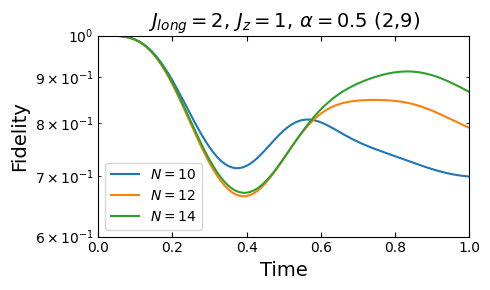

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2Jz1FidelityHfulla05far{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2Jz1FidelityHfullW0a05far{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 1)
ax.set_ylim(6e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0.5$ (2,9)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jlong2FidelityHfullHfull2W0a05far.svg", dpi=600, bbox_inches="tight")
plt.show()


### alpha=0.5, b1 with and without Kac

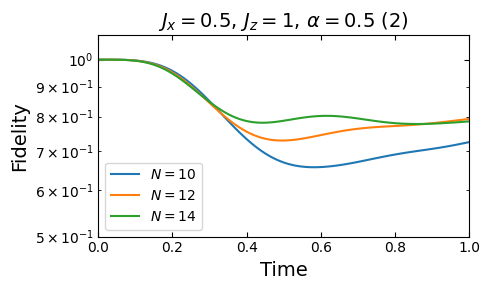

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx05Jz1FidelityHfulla05b1close{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHfullW0a05b1close{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 1)
ax.set_ylim(5e-1, 1.1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=0.5,\, J_z=1,\, \alpha=0.5$ (2)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx05FidelityHfullHfullW0a05b1close.svg", dpi=600, bbox_inches="tight")
plt.show()


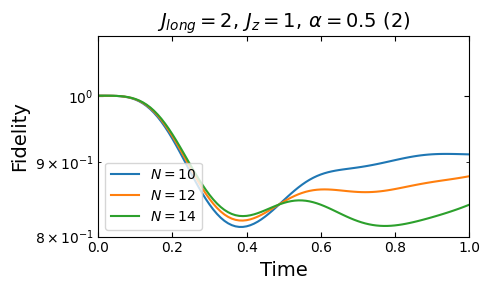

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2Jz1FidelityHfulla05b1close{varyVariable}Wavefunction.txt")
    # Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2Jz1FidelityHfullW0a05b1close{varyVariable}Wavefunction.txt")
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 1)
ax.set_ylim(8e-1, 1.1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0.5$ (2)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower left", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jlong2FidelityHfullHfullW0a05b1close.svg", dpi=600, bbox_inches="tight")
plt.show()


### alpha=0, b1 and b2 with and without Kac

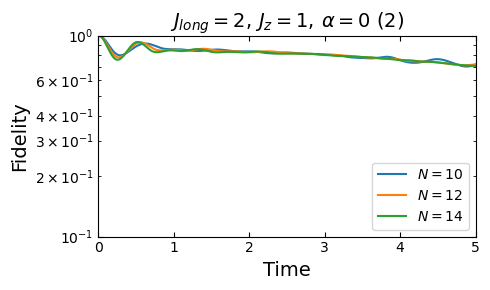

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2Jz1FidelityHfulla0b1{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2Jz1FidelityHfullW0a0b1{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 5)
ax.set_ylim(1e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0$ (2)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
# fig.savefig("plt/NVariedJz1Jlong2FidelityHfullHfullW0b1a0.svg", dpi=600, bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jlong2Jz1FidelityHfulla0b1{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jlong2Jz1FidelityHfullW0a0b1{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 30)
ax.set_ylim(1e-4, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{long}=2,\, J_z=1,\, \alpha=0$ (2)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
# fig.savefig("plt/NVariedJz1Jlong2FidelityHfullHfullW0b1a0.svg", dpi=600, bbox_inches="tight")
plt.show()


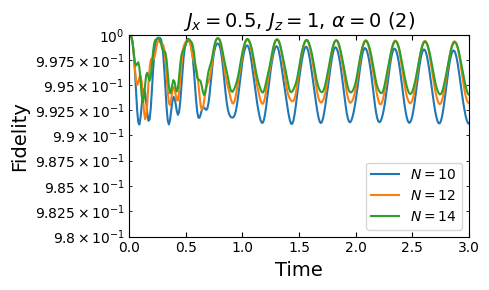

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx05Jz1FidelityHfulla0b1{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx05Jz1FidelityHfullW0a0b1{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 3)
ax.set_ylim(9.8e-1, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=0.5,\, J_z=1,\, \alpha=0$ (2)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx05FidelityHfullHfullW0b1a0.svg", dpi=600, bbox_inches="tight")
plt.show()


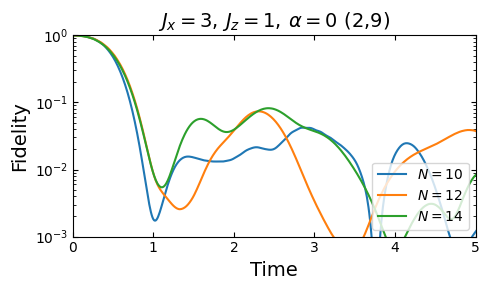

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

# === Parameters ===
varyVariable_list = [10, 12, 14] #, 12,14
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    # Wavefunction files for this J_long
    Heff2   = os.path.join(base_path, f"Jx3Jz1FidelityHfulla0far{varyVariable}Wavefunction.txt")
    Heff2W0 = os.path.join(base_path, f"Jx3Jz1FidelityHeff2W0a05far{varyVariable}Wavefunction.txt")
    
    # Compute fidelity on the fly
    times, fidelity = compute_fidelity(Heff2, Heff2W0)
    
    # Plot (semilogy like in your snippet)
    ax.semilogy(times, fidelity, lw=1.5, ms=4,
                label=fr"$N={varyVariable:.0f}$")

# === Styling ===
ax.set_xlim(0, 5)
ax.set_ylim(1e-3, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$J_{x}=3,\, J_z=1,\, \alpha=0$ (2,9)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=10, frameon=True, loc="lower right", ncol=1)
fig.tight_layout()

# === Save ===
fig.savefig("plt/NVariedJz1Jx3FidelityHfullHeff2W0a0far.svg", dpi=600, bbox_inches="tight")
plt.show()


## Fidelity-Heff2W0 - Hfull

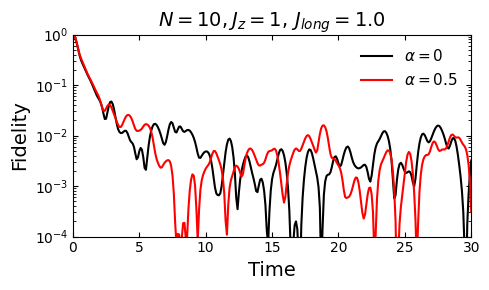

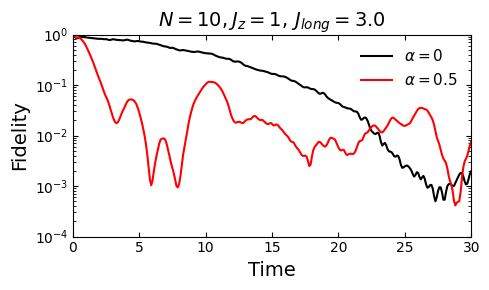

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === Helper function to load and downsample ===
def load_fidelity(path, step=10):
    data = np.loadtxt(path)
    time = data[:, 0]
    fidelity = data[:, 2]
    return time[::step], fidelity[::step]

# === Parameters ===
tmax = 30
tInterval = 1
step = 10

# === File paths ===
varyVariable_values = [30, 90]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

for varyVariable in varyVariable_values:
    locF9  = f"{base_path}\\NoIPHN10B0Jz1FidelityHeff2W0Hfulla0{varyVariable}.txt"
    locF11 = f"{base_path}\\NoIPHN10B0Jz1FidelityHeff2W0Hfulla05{varyVariable}.txt"

    # Load
    t9, f9 = load_fidelity(locF9, step)
    t11, f11 = load_fidelity(locF11, step)

    # === Plotting ===
    fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

    # α = 0 data
    ax.semilogy(t9, f9, color="black", lw=1.5, ms=4,
                label=r"$\alpha=0$")

    # α = 0.5 data
    ax.semilogy(t11, f11, color="red", lw=1.5, ms=4,
                label=r"$\alpha=0.5$")

    # === Styling ===
    ax.set_xlim(0, 30)
    ax.set_ylim(1e-4, 1)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel("Fidelity", fontsize=14)
    ax.set_title(fr"$N=10, J_z=1,\, J_{{long}}={varyVariable/30:.1f}$",
                 fontsize=14, pad=6)

    ax.tick_params(which="both", direction="in", top=True, right=True)
    ax.legend(fontsize=11, frameon=False, loc="upper right")
    fig.tight_layout()

    # === Save ===
    fig.savefig(f"plt/FidelityPlot_{varyVariable}.svg", dpi=600, bbox_inches="tight")
    plt.show()


## Fidelity-Heff1|Hfull for superposition states

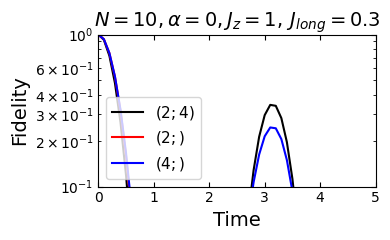

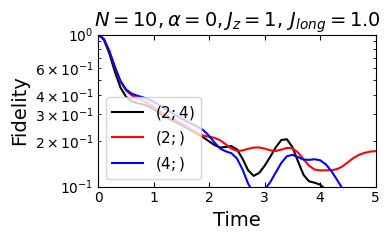

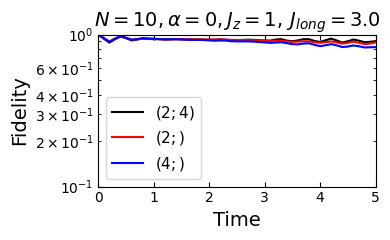

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# === Helper function to load and downsample ===
def load_fidelity(path, step=10):
    data = np.loadtxt(path)
    time = data[:, 0]
    fidelity = data[:, 2]
    return time[::step], fidelity[::step]

# === Parameters ===
tmax = 30
tInterval = 1
step = 10

# === File paths ===
varyVariable_values = [10,30,90] #60,
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

for varyVariable in varyVariable_values:
    locF9  = f"{base_path}\\IPHN10B0Jz1Fidelityb1bAllJlong{varyVariable}.txt"
    locF11 = f"{base_path}\\NoIPHN10B0Jz1Fidelityb1bAllJlong{varyVariable}.txt"
    locF13 = f"{base_path}\\NoIPHN10B0Jz1Fidelityb12bAllJlong{varyVariable}.txt"
    
    # Load
    t9, f9   = load_fidelity(locF9, step)
    t11, f11 = load_fidelity(locF11, step)
    t13, f13 = load_fidelity(locF13, step)

    # === Plotting ===
    fig, ax = plt.subplots(figsize=(4, 2.5))  # PRL one-column

    # α = 0 data
    ax.semilogy(t9, f9, color="black", lw=1.5, ms=4,
                label=r"$(2;4)$")

    # α = 0.5 data
    ax.semilogy(t11, f11, color="red", lw=1.5, ms=4,
                label=r"$(2;)$")

    # α = 1.0 data (new third line)
    ax.semilogy(t13, f13, color="blue", lw=1.5, ms=4,
                label=r"$(4;)$")

    # === Styling ===
    ax.set_xlim(0, 5)
    ax.set_ylim(1e-1, 1)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel("Fidelity", fontsize=14)
    ax.set_title(fr"$N=10, \alpha=0, J_z=1,\, J_{{long}}={varyVariable/30:.1f}$",
                 fontsize=14, pad=6)

    ax.tick_params(which="both", direction="in", top=True, right=True)
    ax.legend(fontsize=11, frameon=True, loc="lower left")
    fig.tight_layout()

    # === Save ===
    fig.savefig(f"plt/Fidelityb1superposition_{varyVariable}.svg", dpi=600, bbox_inches="tight")
    plt.show()


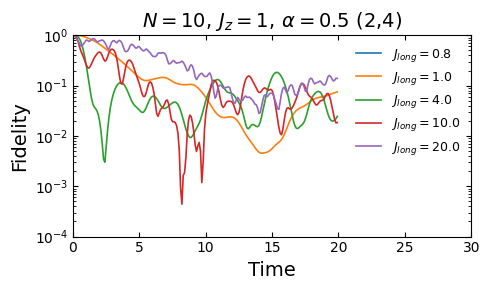

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Helper function ===
def load_fidelity(path, step=10):
    data = np.loadtxt(path)
    time = data[:, 0]
    fidelity = data[:, 2]
    return time[::step], fidelity[::step]

# === Parameters ===
step = 10
varyVariable_list = [25, 30, 120, 300, 600]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    locF = f"{base_path}\\N15B0Jz1FidelityHeff2a05close{varyVariable}.txt"

    # Load
    t, f = load_fidelity(locF, step)

    # Plot (all α=0.5 curves together)
    ax.semilogy(t, f, lw=1.2,
                label=fr"$J_{{long}}={varyVariable/30:.1f}$")

# === Styling ===
ax.set_xlim(0, 30)
ax.set_ylim(1e-4, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$N=10,\, J_z=1,\, \alpha=0.5$ (2,4)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=9, frameon=False, loc="upper right", ncol=1)
fig.tight_layout()

# === Save ===
# fig.savefig("plt/FidelityN10_Alpha05_AllJlong.svg", dpi=600, bbox_inches="tight")
plt.show()




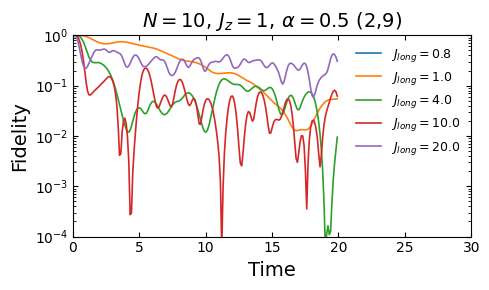

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === Helper function ===
def load_fidelity(path, step=10):
    data = np.loadtxt(path)
    time = data[:, 0]
    fidelity = data[:, 2]
    return time[::step], fidelity[::step]

# === Parameters ===
step = 10
varyVariable_list = [25, 30, 120, 300, 600]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    locF = f"{base_path}\\N10B0Jz1FidelityHeff2W0Heff2a05far{varyVariable}.txt"

    # Load
    t, f = load_fidelity(locF, step)

    # Plot (all α=0.5 curves together)
    ax.semilogy(t, f, lw=1.2,
                label=fr"$J_{{long}}={varyVariable/30:.1f}$")

# === Styling ===
ax.set_xlim(0, 30)
ax.set_ylim(1e-4, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$N=10,\, J_z=1,\, \alpha=0.5$ (2,9)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=9, frameon=False, loc="upper right", ncol=1)
fig.tight_layout()

# === Save ===
# fig.savefig("plt/FidelityN10_Alpha05_AllJlong.svg", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Helper function ===
def load_fidelity(path, step=10):
    data = np.loadtxt(path)
    time = data[:, 0]
    fidelity = data[:, 2]
    return time[::step], fidelity[::step]

# === Parameters ===
step = 10
varyVariable_list = [25, 30, 120, 300]
base_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\B0LFIMwithLR"

# === Plotting ===
fig, ax = plt.subplots(figsize=(5, 3))  # PRL one-column

for varyVariable in varyVariable_list:
    locF = f"{base_path}\\N30B0Jz1FidelityHeff2W0Heff2a05far{varyVariable}.txt"

    # Load
    t, f = load_fidelity(locF, step)

    # Plot (all α=0.5 curves together)
    ax.semilogy(t, f, lw=1.2,
                label=fr"$J_{{long}}={varyVariable/30:.1f}$")

# === Styling ===
ax.set_xlim(0, 30)
ax.set_ylim(1e-4, 1)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Fidelity", fontsize=14)
ax.set_title(r"$N=10,\, J_z=1,\, \alpha=0.5$ (2,28)", fontsize=14, pad=6)

ax.tick_params(which="both", direction="in", top=True, right=True)
ax.legend(fontsize=9, frameon=False, loc="upper right", ncol=1)
fig.tight_layout()

# === Save ===
# fig.savefig("plt/FidelityN10_Alpha05_AllJlong.svg", dpi=600, bbox_inches="tight")
plt.show()